### Data Generation

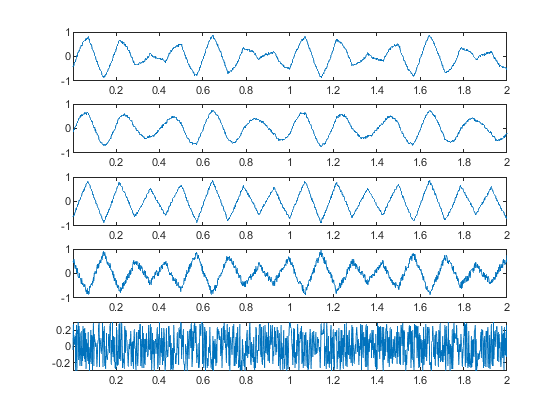

In [1]:
%% Author: Lu, Chia-Feng 2013.11.28
clear, close all
clc

%% initialize parameters
samplerate=500; % in Hz
N=1000; % data length

freq1=5; % in Hz
freq2=7; % in Hz
taxis=[1:N]/samplerate;

PCnum=2;  % the number of PC used to reconstruct signals

%% generate test signals 
C1 = 0.75*sin(2*pi*freq1*taxis);        % 1st component: a sine wave
C2 = sawtooth(2*pi*freq2*taxis,0.5);    % 2nd component: a triangular wave

% Combine data in different proportions
X(1,:) = 0.5*C1 + 0.5*C2 + 0.1*rand(1,N);
X(2,:) = 0.7*C1 + 0.2*C2 + 0.1*rand(1,N);
X(3,:) = 0.2*C1 + 0.7*C2 + 0.1*rand(1,N);
X(4,:) = -0.3*C1 - 0.6*C2 + 0.3*rand(1,N);
X(5,:) = 0.6*rand(1,N);    % Noise only

% Center data by subtracting mean
X = X - mean(X,2)*ones(1,N);

figure, 
for i=1:size(X,1)
    subplot(size(X,1),1,i)
    plot(taxis,X(i,:)),xlim([taxis(1) taxis(end)])
end

### Principal Components Analysis 
using princomp funcion (using eig and svd)


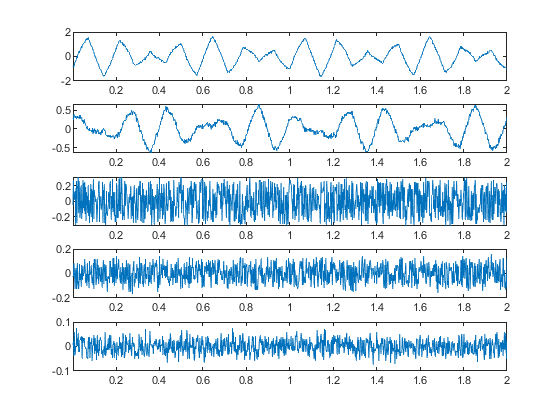

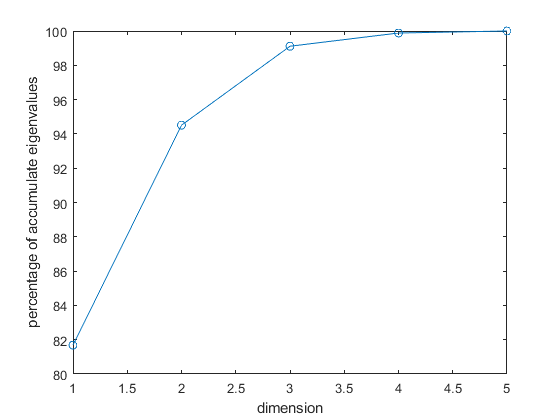

In [2]:
%% Principal Components Analysis using princomp funcion (using eig and svd)
[U,PC,eigenVal]=pca(X');

for i=1:size(X,1)
    eigen_perc(i)=sum(eigenVal(1:i))/sum(eigenVal)*100;  % calculate accumulated percentage of eigenvalues
end

figure, 
for i=1:size(PC,2)
    subplot(size(PC,2),1,i)
    plot(taxis,PC(:,i)),xlim([taxis(1) taxis(end)])
end

figure,plot(eigen_perc,'-o')
xlabel('dimension'),ylabel('percentage of accumulate eigenvalues')

In [3]:
%% Check the covariance of principal components (PC)
cov(PC)  % make sure if the PCs are uncorrelated !
% the off-diagonal terms should be 0


ans =

    0.5441    0.0000    0.0000    0.0000   -0.0000
    0.0000    0.0854   -0.0000   -0.0000    0.0000
    0.0000   -0.0000    0.0307    0.0000   -0.0000
    0.0000   -0.0000    0.0000    0.0051    0.0000
   -0.0000    0.0000   -0.0000    0.0000    0.0008




### Reconstruct the Signal
only use the first PCnum PCs

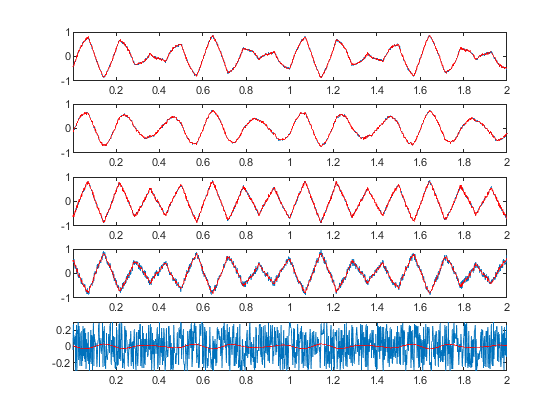

In [4]:
%% Reconstruct the Signal only use the first PCnum PCs
newX = U(:,1:PCnum)*PC(:,1:PCnum)';

figure, 
for i=1:size(newX,1)
    subplot(size(newX,1),1,i)
    plot(taxis,X(i,:)),hold on
    plot(taxis,newX(i,:),'r'),xlim([taxis(1) taxis(end)])
end

### ICA analysis using FastICA

In [5]:
%% initialize parameters
path(path,'.\fastica_25');  % add FastICA path

ICNo=3;  % the specified number of independent components
PCNo=3;  % the preserved number of PCs 

In [6]:
%% Independent Components Analysis using FastICA
[icasig, A, W] = fastica(X,'numOfIC',ICNo,'displayMode','off','firstEig',1,'lastEig',PCNo); % fast ICA

% [icasig, A, W] = fastica(X,'numOfIC',ICNo,'displayMode','off','interactivePCA','on'); % fast ICA
% fasticag(X)  % used the correct number of PCA can always produce good results
% [icasig, A, W] = fastica (X)

Number of signals: 5
Number of samples: 1000
Calculating covariance...
Reducing dimension...
Selected [ 3 ] dimensions.
Smallest remaining (non-zero) eigenvalue [ 0.0306385 ]
Largest remaining (non-zero) eigenvalue [ 0.543576 ]
Sum of removed eigenvalues [ 0.0059112 ]
[ 99.1117 ] % of (non-zero) eigenvalues retained.
Whitening...
Check: covariance differs from identity by [ 1.11022e-15 ].
Used approach [ defl ].
Used nonlinearity [ pow3 ].
Starting ICA calculation...
IC 1 ......computed ( 6 steps ) 
IC 2 ........computed ( 8 steps ) 
IC 3 ..computed ( 2 steps ) 
Done.
Adding the mean back to the data.



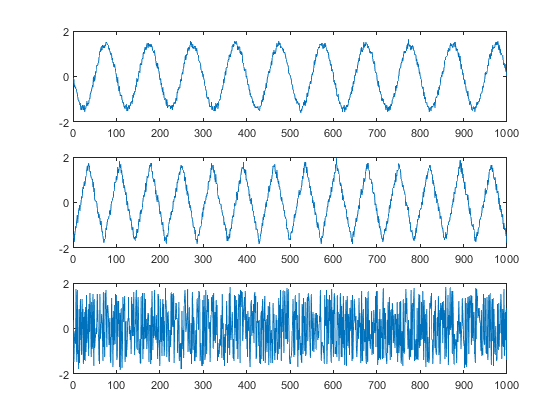

In [7]:
figure,
for i=1:size(icasig,1)
    subplot(size(icasig,1),1,i),plot(icasig(i,:))
end

return

### Reconstruct the signal with the two idependent componnent

In [8]:
%% reconstruct signal
rejectICA=3;
% reconstruct the signal
A2=A;
icasig2=icasig;
A2(:,rejectICA)=[];
icasig2(rejectICA,:)=[];

newX=(A2*icasig2);


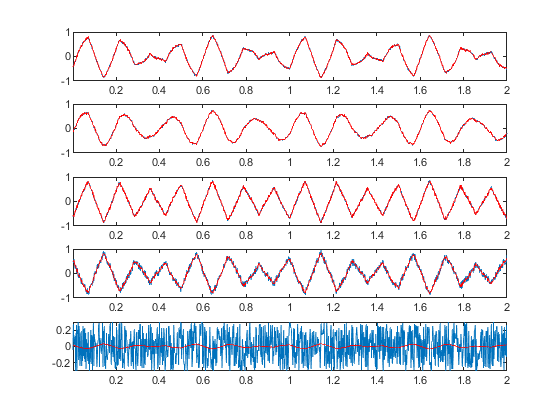

In [9]:
figure, 
for i=1:size(newX,1)
    subplot(size(newX,1),1,i)
    plot(taxis,X(i,:)),xlim([taxis(1) taxis(end)]), hold on
    plot(taxis,newX(i,:),'r'),xlim([taxis(1) taxis(end)])
end